# Score Distribution

In [1]:
import pandas as pd
import statistics #calculate mean and others
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
import numpy as np

In [2]:
#import data
abstracts_all = pd.read_csv(r'/home/zz3hs/git/dspg21RnD/data/dspg21RnD/abstracts_embedding_score_stats.csv')   

/apps/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,17,18,19,23,26,27,48,49,51,52,57,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
abstracts_all

,original index,PROJECT_ID_x,ABSTRACT_x,FY_x,ORG_COUNT_x,PI_COUNT_x,nchar_x,final_frqwds_removed_x,PROJECT_TERMS_x,PROJECT_TITLE_x,...,IS_AI_2,IS_AI,sentence_score_float,abstract_score,num_sentences,range_sentence_score,max_sentence_score,median_sentence_score,mean_abstract_score,skewness_sentence_score
0,17608,152242.0,The multiprotein complex y-secretase proteolyt...,2008,1,1,1402,"['multiprotein', 'y_secretase', 'proteolytical...",Active Sites; Affect; Alzheimer's Disease; Am...,STRUCTURE OF SIGNAL PEPTIDE PEPTIDASE,...,False,False,"[0.24746138006448745, 0.21845135390758513, 0.1...",0.263356,10,0.130378,0.324700,0.259478,0.263356,-0.054603
1,111864,190316.0,DESCRIPTION (provided by applicant): The Kis...,2008,1,1,2553,"['kissl', 'gene', 'encode', 'peptide', 'kisspe...",Affect; Animal Model; Axon; Behavior; Behavio...,ROLE OF KISS1 NEURONS IN THE SEASONAL AND CIRC...,...,False,False,"[0.1978494793176651, 0.1886032670736313, 0.209...",0.246339,13,0.126995,0.315598,0.239884,0.246339,0.187634
2,22052,154213.0,DESCRIPTION (provided by applicant): The objec...,2008,1,1,1414,"['biophysical', 'basis', 'thermodynamics_kinet...",Agreement; Antibodies; base; Binding; Biochem...,CARBONIC ANHYDRASE AS A MODEL TO UNDERSTAND DI...,...,False,False,"[0.3822216421365738, 0.3518402636051178, 0.291...",0.338063,9,0.160513,0.386953,0.351840,0.338063,-0.961812
3,35004,159362.0,Obesity is the cause of many adverse pregnancy...,2008,1,1,1545,"['obesity', 'adverse_pregnancyoutcome', 'great...",African; Analysis of Variance; Asians; Birth;...,OBESITY ON VAGAL TONE AND HBA1C DURING PREGNANCY,...,False,False,"[0.22951880991458892, 0.22275955677032472, 0.2...",0.262953,8,0.170099,0.372822,0.253833,0.262953,0.995367
4,371628,594482.0,Local potato advisory groups have expressed in...,2010,1,1,271,"['local', 'potato', 'advisory', 'express', 'in...",cost; Health; interest; Manure; Parasitic nem...,PLANT-PARASITIC NEMATODE MANAGEMENT AS A COMPO...,...,False,False,"[0.3108045756816864, 0.23935555219650267, 0.23...",0.263024,3,0.071892,0.310805,0.239356,0.263024,0.707016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690802,1034758,1126666.0,Project Summary/AbstractThe pathophysiology of...,2019,1,1,2836,"['pathophysiology', 'schizophrenia', 'advance'...",Adolescence; Adult; Adult Children; Affect; A...,GUT DYSBIOSIS AND 5-HT2A DYSREGULATION IN A PR...,...,False,False,"[0.33123610019683836, 0.3012551009654999, 0.24...",0.328588,9,0.228547,0.453647,0.329292,0.328588,0.231218
690803,1074034,1109788.0,PROJECT SUMMARY:Alzheimer’s Disease (AD) and A...,2019,1,1,2899,"['alzheimer', 'ad', 'amyotrophic_lateral_scler...",abeta deposition; Acetylgalactosamine; Affect...,TISSUE-SPECIFIC MODULATION OF APOLIPOPROTEIN E...,...,False,False,"[0.361808118224144, 0.26558108180761336, 0.354...",0.312813,17,0.164942,0.380714,0.329647,0.312813,-0.508787
690804,1029450,1038442.0,"Project SummaryThe highest rates of mortality,...",2018,1,1,2186,"['highest', 'mortality', 'acute', 'care', 'enc...",Acute; Address; Adherence; Adolescent; Adoles...,THE FEASIBILITY OF A MEDICAL STUDENT MENTORING...,...,False,False,"[0.22292933315038682, 0.30795369744300843, 0.3...",0.318411,10,0.131873,0.354802,0.326085,0.318411,-1.649561
690805,1074409,1154490.0,PROJECT SUMMARY: Treatment paradigms for kidne...,2019,1,1,3056,"['paradigm', 'kidney', 'largely', 'stagnant', ...",3-Dimensional; Acute; Acute Renal Failure wit...,STRATEGIES IN RENAL NANOMEDICINE TO IMPACT TRE...,...,False,False,"[0.31384116411209106, 0.29013317823410034, 0.2...",0.313640,13,0.204967,0.408158,0.311917,0.313640,-0.095242


## Distribution of number of sentences per abstract

count    690807.000000
mean         13.033040
std           6.867664
min           1.000000
25%           9.000000
50%          12.000000
75%          16.000000
max         318.000000
Name: num_sentences, dtype: float64


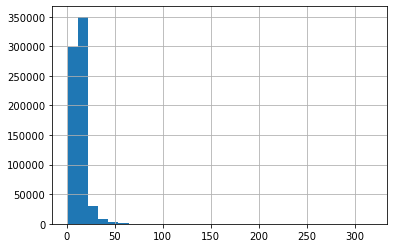

In [17]:
hist = abstracts_all.num_sentences.hist(bins=30)
print(abstracts_all.num_sentences.describe())

count    690807.000000
mean          0.100119
std           0.582395
min          -2.869451
25%          -0.266175
50%           0.079460
75%           0.465173
max           3.357550
Name: skewness_sentence_score, dtype: float64


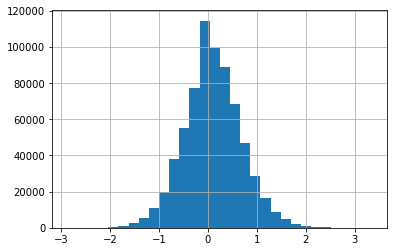

In [31]:
## Distribution of sentences skewness
hist = abstracts_all.skewness_sentence_score.hist(bins=30)
print(abstracts_all.skewness_sentence_score.describe())

## Abstract score distribution

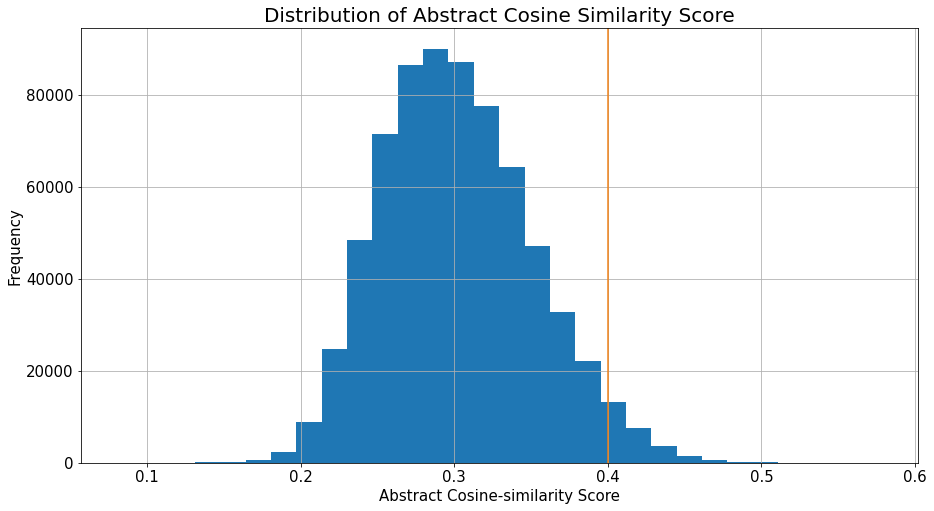

count    690807.000000
mean          0.302218
std           0.048859
min           0.081673
25%           0.266460
50%           0.298573
75%           0.334063
max           0.576933
Name: mean_abstract_score, dtype: float64


In [78]:
## Distribution of sentences average
plt.figure(figsize=[15,8])
hist = abstracts_all.mean_abstract_score.hist(bins=30)
hist.axvline(x=np.mean(abstracts_all.mean_abstract_score)+2*np.std(abstracts_all.mean_abstract_score), ls = "-", color='#F18015', alpha=5)
plt.xlabel('Abstract Cosine-similarity Score',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distribution of Abstract Cosine Similarity Score' ,fontsize=20)
plt.show()

print(abstracts_all.mean_abstract_score.describe())

### All abstract: mean sentence score vs max sentence score

count    690807.000000
mean          0.302218
std           0.048859
min           0.081673
25%           0.266460
50%           0.298573
75%           0.334063
max           0.576933
Name: mean_abstract_score, dtype: float64
count    690807.000000
mean          0.390864
std           0.055314
min           0.081673
25%           0.354213
50%           0.392803
75%           0.428260
max           0.718298
Name: max_sentence_score, dtype: float64


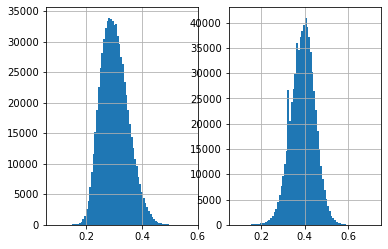

In [21]:
#Distribution of abstract average score
fig, axes = plt.subplots(1, 2)
abstracts_all.mean_abstract_score.hist(bins=80,ax=axes[0])
abstracts_all.max_sentence_score.hist(bins=80, ax=axes[1])


print(abstracts_all.mean_abstract_score.describe())
print(abstracts_all.max_sentence_score.describe())

### Comparing the mean embedding score between AI and Not AI abstracts

count    685060.000000
mean          0.301614
std           0.048374
min           0.081673
25%           0.266211
50%           0.298111
75%           0.333341
max           0.551867
Name: mean_abstract_score, dtype: float64
count    5747.000000
mean        0.374206
std         0.052710
min         0.208540
25%         0.338525
50%         0.375299
75%         0.411250
max         0.576933
Name: mean_abstract_score, dtype: float64


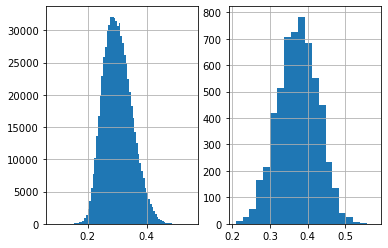

In [22]:
#Distribution of abstract average score
abstracts_not_ai = abstracts_all[abstracts_all["IS_AI"] == False]
abstracts_ai = abstracts_all[abstracts_all["IS_AI"] == True]

fig, axes = plt.subplots(1, 2)
abstracts_not_ai.abstract_score.hist(bins=80,ax=axes[0])
abstracts_ai.abstract_score.hist(bins=20, ax=axes[1])


print(abstracts_not_ai.mean_abstract_score.describe())
print(abstracts_ai.mean_abstract_score.describe())

In [119]:
abstracts_not_ai = abstracts_all.query('IS_AI == False')['abstract_score']
abstracts_ai = abstracts_all.query('IS_AI == True')['abstract_score']

res = stats.ttest_ind(abstracts_ai, abstracts_not_ai, equal_var=True)

display(res)

Ttest_indResult(statistic=112.82893067496268, pvalue=0.0)

### Comparing the median embedding score between AI and Not AI abstracts


count    685060.000000
mean          0.300391
std           0.051816
min           0.081673
25%           0.262005
50%           0.297113
75%           0.334778
max           0.585794
Name: median_sentence_score, dtype: float64
count    5747.000000
mean        0.375073
std         0.055289
min         0.200108
25%         0.337349
50%         0.376024
75%         0.413810
max         0.585170
Name: median_sentence_score, dtype: float64


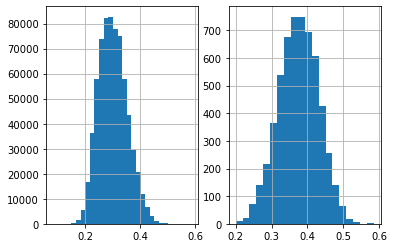

In [24]:
#Distribution of abstract average score
abstracts_not_ai = abstracts_all[abstracts_all["IS_AI"] == False]
abstracts_ai = abstracts_all[abstracts_all["IS_AI"] == True]

fig, axes = plt.subplots(1, 2)
abstracts_not_ai.median_sentence_score.hist(bins=30,ax=axes[0])
abstracts_ai.median_sentence_score.hist(bins=20, ax=axes[1])


print(abstracts_not_ai.median_sentence_score.describe())
print(abstracts_ai.median_sentence_score.describe())

### Comparing the max embedding score between AI and Not AI abstracts

count    685060.000000
mean          0.390211
std           0.054847
min           0.081673
25%           0.353858
50%           0.392310
75%           0.427536
max           0.718298
Name: max_sentence_score, dtype: float64
count    5747.000000
mean        0.468651
std         0.055617
min         0.257805
25%         0.431931
50%         0.468303
75%         0.506304
max         0.667100
Name: max_sentence_score, dtype: float64


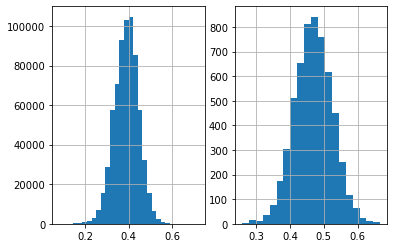

In [23]:
#Distribution of abstract average score
abstracts_not_ai = abstracts_all[abstracts_all["IS_AI"] == False]
abstracts_ai = abstracts_all[abstracts_all["IS_AI"] == True]

fig, axes = plt.subplots(1, 2)
abstracts_not_ai.max_sentence_score.hist(bins=30,ax=axes[0])
abstracts_ai.max_sentence_score.hist(bins=20, ax=axes[1])


print(abstracts_not_ai.max_sentence_score.describe())
print(abstracts_ai.max_sentence_score.describe())

### Distribution of the difference between max and min sentence score per abstract 

count    690773.000000
mean          0.175742
std           0.062373
min           0.000000
25%           0.136448
50%           0.175998
75%           0.217013
max           0.506595
Name: diff_sentence_score, dtype: float64


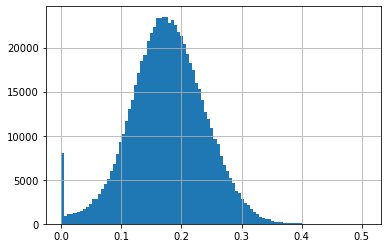

In [81]:
hist = abstracts_all.range_sentence_score.hist(bins=100)
print(abstracts_all.range_sentence_score.describe())

# Choose a cutoff

In [4]:
sd = abstracts_all.mean_abstract_score.std()
mean = abstracts_all.mean_abstract_score.mean()

In [5]:
cutoff = mean + 2.5*sd
cutoff

0.42436523250810476

In [6]:
abstracts_ai = abstracts_all[(abstracts_all["mean_abstract_score"] > cutoff)]
abstracts_ai = abstracts_ai[["PROJECT_ID_x", "ABSTRACT_x", "final_frqwds_removed_x", "PROJECT_TITLE_x", "mean_abstract_score"]]

In [7]:
abstracts_ai = abstracts_ai.rename(columns={
                       "PROJECT_ID_x":"PROJECT_ID",
                       "ABSTRACT_x":"ABSTRACT",
                        "final_frqwds_removed_x": "final_frqwds_removed",
                        "PROJECT_TITLE_x": "PROJECT_TITLE",
                        "mean_abstract_score": "cosine_similarity_score"})
abstracts_ai["IS_AI_BERT"] = True

In [8]:
abstracts_ai["PROJECT_ID"] = abstracts_ai["PROJECT_ID"].astype(int)
abstracts_ai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7658 entries, 130 to 690682
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROJECT_ID               7658 non-null   int64  
 1   ABSTRACT                 7658 non-null   object 
 2   final_frqwds_removed     7658 non-null   object 
 3   PROJECT_TITLE            7658 non-null   object 
 4   cosine_similarity_score  7658 non-null   float64
 5   IS_AI_BERT               7658 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 366.4+ KB


In [9]:
print("Results: ",len(abstracts_ai)/len(abstracts_all)*100,"(N=",len(abstracts_ai),")% of the projects are classified as AI related.")

Results:  1.1085585409528276 (N= 7658 )% of the projects are classified as AI related.


In [10]:
#abstracts_ai.to_csv(r'/home/zz3hs/git/dspg21RnD/data/dspg21RnD/bert_ai_abstracts_2.csv', index = False)  